In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')
deliveries.drop(['player_dismissed','dismissal_kind','fielder'],inplace=True,axis=1)
deliveries.wide_runs.replace(0,np.nan,inplace=True)
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [3]:
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,NaN,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,NaN,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,NaN,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,NaN,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2.0,0,0,0,0,0,2,2
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,NaN,0,0,0,0,0,0,0
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,NaN,0,1,0,0,0,1,1
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,NaN,0,0,0,0,1,0,1
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,NaN,0,0,0,0,4,0,4
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,NaN,0,0,1,0,0,1,1


In [5]:
rr_dc=matches[((matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals')) & ((matches.team1=='Rajasthan Royals') | (matches.team2=='Rajasthan Royals'))]
dc=matches[(matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals')]
rr=matches[(matches.team1=='Rajasthan Royals') | (matches.team2=='Rajasthan Royals')]
rr_dc.shape,rr.shape,dc.shape

((20, 18), (147, 18), (177, 18))

In [6]:
rr_dcdeli=deliveries[((deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals')) & ((deliveries.batting_team=='Rajasthan Royals') | (deliveries.bowling_team=='Rajasthan Royals'))]
dcdeli=deliveries[(deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals')]
rrdeli=deliveries[(deliveries.batting_team=='Rajasthan Royals') | (deliveries.bowling_team=='Rajasthan Royals')]
rr_dcdeli.shape,rrdeli.shape,dcdeli.shape

((4617, 18), (34674, 18), (41383, 18))

In [7]:
rr_dc.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
92,93,2008,Jaipur,2008-05-11,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,NaN


In [8]:
dc.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


In [9]:
rr.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
64,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
67,68,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN


In [10]:
def plot_helper(df,columns,size,plot_type,color):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color=color)
        ax[i].set_title(columns[i])

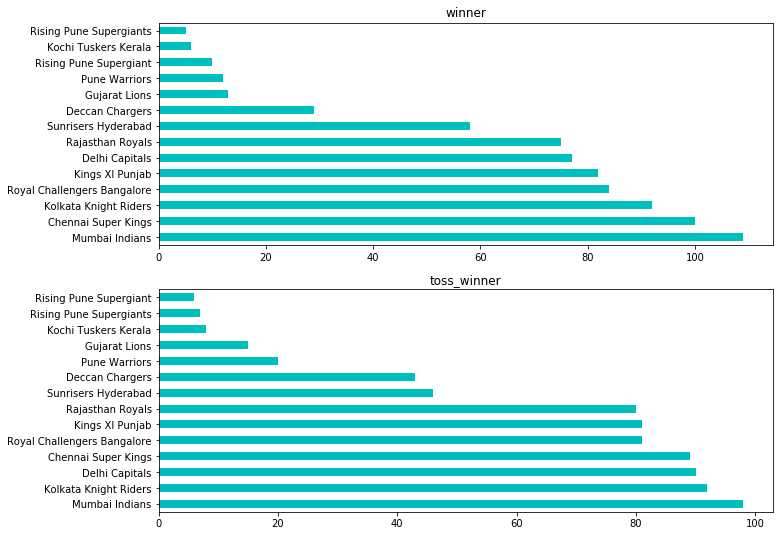

In [11]:
plot_helper(matches,['winner','toss_winner'],(11,9),'barh','c')

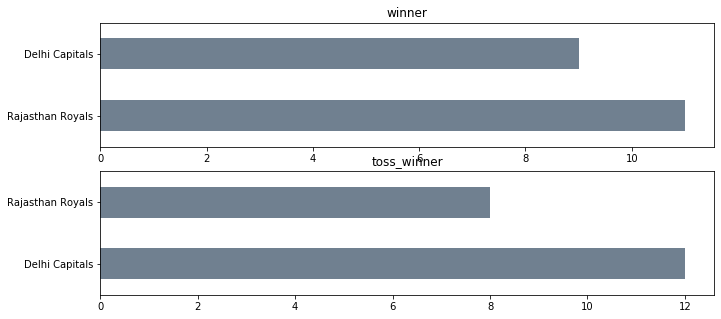

In [12]:
plot_helper(rr_dc,['winner','toss_winner'],(11,5),'barh','slategray')

### It seems kind of awkward as there is strong correlation between the toss_winner and the winner but it's different in this case so the prediction won't be accurate at all without the usage of machine learning but i will refrain from doing that as it is a data analytics internship nontheless i will go with RR

In [13]:
dcdeli.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
64759,274,1,Delhi Capitals,Kochi Tuskers Kerala,5,2,NV Ojha,DA Warner,P Parameswaran,0,NaN,0,0,0,0,0,0,0
47822,203,1,Delhi Capitals,Rajasthan Royals,9,1,G Gambhir,KM Jadhav,SK Warne,0,NaN,0,0,0,0,1,0,1
106925,451,1,Pune Warriors,Delhi Capitals,13,5,AD Mathews,Yuvraj Singh,S Nadeem,0,NaN,0,0,0,0,1,0,1
92354,390,2,Delhi Capitals,Mumbai Indians,12,4,MC Juneja,IK Pathan,KA Pollard,0,NaN,0,0,0,0,1,0,1
20382,87,2,Chennai Super Kings,Delhi Capitals,5,7,S Vidyut,SP Fleming,PJ Sangwan,0,NaN,0,0,0,0,1,0,1


In [14]:
dcdeli.inning.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [15]:
power_runsdc=dcdeli.pivot_table(index=['match_id','over'],values=['total_runs'],aggfunc=['mean','sum'])

power_runsdc.head(6)

mean        sum
              total_runs total_runs
match_id over                      
5        1      1.461538         19
         2      1.083333         13
         3      1.153846         15
         4      1.250000         15
         5      0.538462          7
         6      1.250000         15

In [16]:
power_dc=dcdeli.groupby(['match_id','over'],as_index=False).sum()
power_dc=power_dc[power_dc.over<=6].groupby('match_id').sum().total_runs


In [17]:
power_dc.describe()

count    177.000000
mean      93.401130
std       18.509291
min       33.000000
25%       82.000000
50%       93.000000
75%      107.000000
max      143.000000
Name: total_runs, dtype: float64

In [18]:
power_dc[power_dc<=100].mean()

83.43333333333334

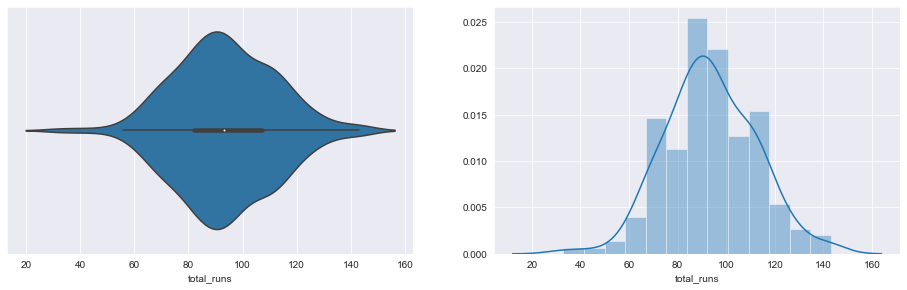

In [19]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(16,10))

fig.add_subplot(221)

sns.violinplot(power_dc)

fig.add_subplot(222)
sns.distplot(power_dc)



### It seems Delhi Capitals are likely to score somewhere between 83-95 in the powerplay itself

In [20]:
deliveries.batsman[deliveries.batsman.str.contains('Smith')].iloc[0]

'SPD Smith'

In [21]:
smith=deliveries[deliveries.batsman=='SPD Smith'].pivot_table(index='match_id',aggfunc='sum').batsman_runs
smith.sample(6)


match_id
422      35
533       6
341      26
11318    12
11331    51
59       51
Name: batsman_runs, dtype: int64

In [22]:
smith.describe()

count     72.000000
mean      28.430556
std       21.091235
min        1.000000
25%       13.000000
50%       24.500000
75%       39.000000
max      101.000000
Name: batsman_runs, dtype: float64

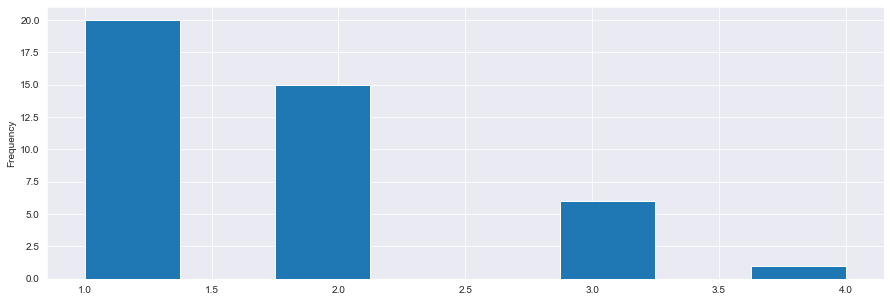

In [23]:
smith.value_counts().sort_values().plot.hist(bins=8,figsize=(15,5))

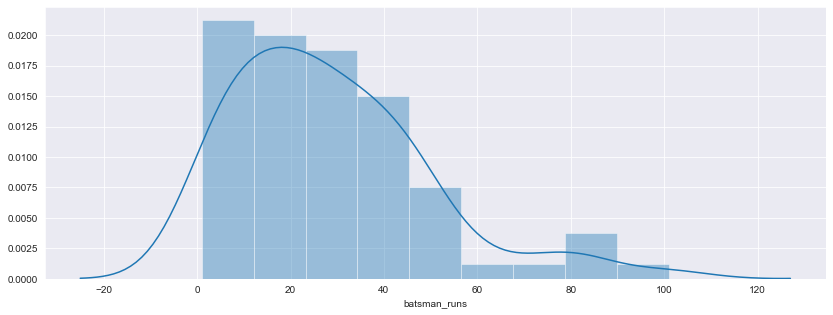

In [24]:
plt.figure(figsize=(14,5))
sns.distplot(smith)


### Smith is likely to score between 0-22

In [25]:
def wide_ball(df):
    df=df.pivot_table(index='match_id',values='wide_runs',aggfunc='count')
    return df.describe()

In [26]:
wide_ball(deliveries),wide_ball(rr_dcdeli),wide_ball(rrdeli),wide_ball(dcdeli)

(        wide_runs
 count  756.000000
 mean     7.149471
 std      3.127767
 min      0.000000
 25%      5.000000
 50%      7.000000
 75%      9.000000
 max     20.000000,
        wide_runs
 count  20.000000
 mean    7.300000
 std     3.010508
 min     3.000000
 25%     5.500000
 50%     7.000000
 75%     9.000000
 max    15.000000,
         wide_runs
 count  147.000000
 mean     7.129252
 std      3.313055
 min      0.000000
 25%      5.000000
 50%      7.000000
 75%      9.000000
 max     19.000000,
         wide_runs
 count  177.000000
 mean     6.858757
 std      2.959450
 min      0.000000
 25%      5.000000
 50%      7.000000
 75%      9.000000
 max     15.000000)

### As all the mean wide balls are near 7 it can be concluded that there will be more than 6 wide balls

# DC

### 0s in win by wickets refers to null values

In [27]:
def wicket_plotter(df,color):
    df.win_by_wickets.value_counts().plot.barh(color=color,
                                           alpha=0.6,
                                           legend=True,
                                           figsize=(12,5))
    plt.xlabel('Frequency')
    plt.ylabel('Wickets  Left')

In [28]:
dc.win_by_wickets.describe()

count    177.000000
mean       3.310734
std        3.426094
min        0.000000
25%        0.000000
50%        3.000000
75%        6.000000
max       10.000000
Name: win_by_wickets, dtype: float64

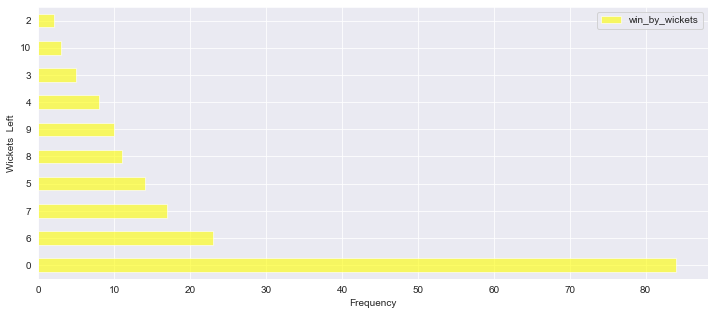

In [29]:
wicket_plotter(dc,'yellow')


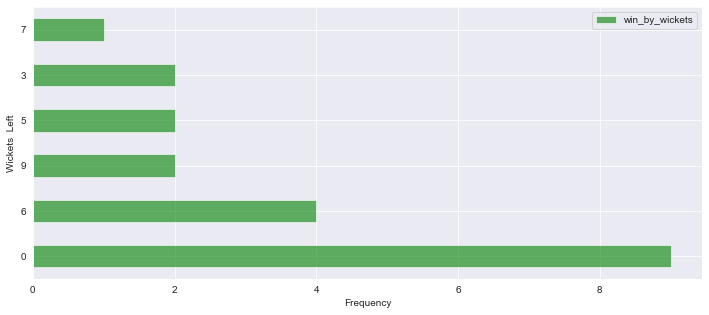

In [30]:
wicket_plotter(rr_dc,'green')

# RR

In [31]:
dc.win_by_wickets.describe()

count    177.000000
mean       3.310734
std        3.426094
min        0.000000
25%        0.000000
50%        3.000000
75%        6.000000
max       10.000000
Name: win_by_wickets, dtype: float64

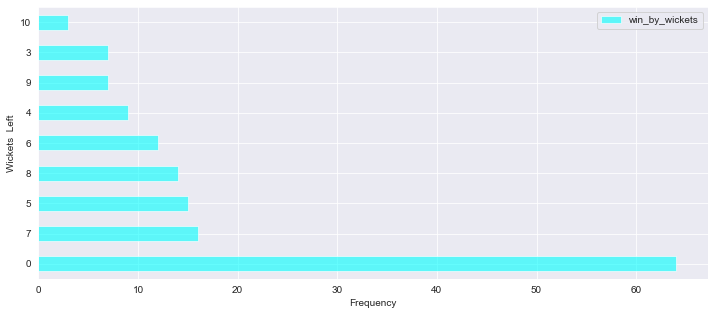

In [32]:
wicket_plotter(rr,'cyan')

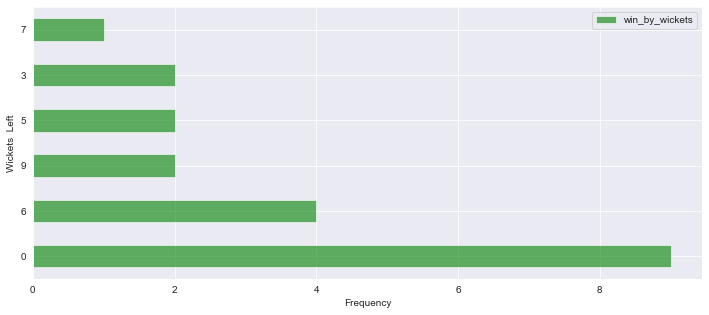

In [33]:
wicket_plotter(rr_dc,'green')

In [34]:
rr_dc.win_by_wickets.describe()

count    20.000000
mean      3.250000
std       3.338373
min       0.000000
25%       0.000000
50%       3.000000
75%       6.000000
max       9.000000
Name: win_by_wickets, dtype: float64

### Since the averages of Delhi Capitals and Rajasthan Royals individually as well as head on suggest that at the end of the match around 6-7 wickets are lost we can take the range after summing the wickets from 11-15